In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
X0 = np.random.normal(loc=(-1.0,-1.0), scale=1.0, size=(50,2))
X1 = np.random.normal(loc=(1.0,1.0), scale=1.0, size=(50,2))
Y0 = np.ones(50, 'd')
Y1 = -np.ones(50, 'd')
X = np.concatenate((X0,X1), axis=0)
Y = np.concatenate((Y0,Y1), axis=0)

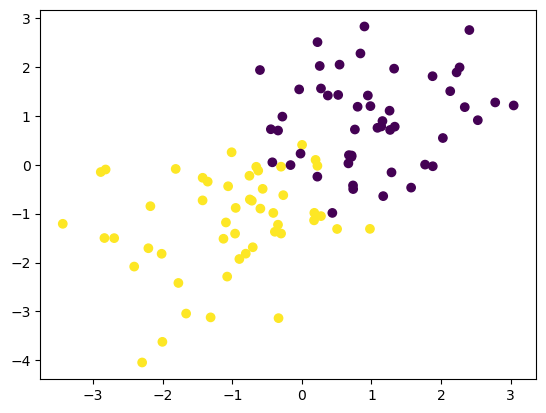

In [20]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [21]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.risks as risks
import mltools.gda as gda

In [22]:
mod = models.LinearModel(2)
mod.param = np.random.random(mod.n_param)
hinge_func = funcs.Hinge()
loss_func = lossfuncs.MarginLoss(hinge_func)
risk_func = risks.Risk(mod, loss_func)
gd = gda.GradientDescent(risk_func, tol=1.0e-6)

In [23]:
gd.fit(X, Y)

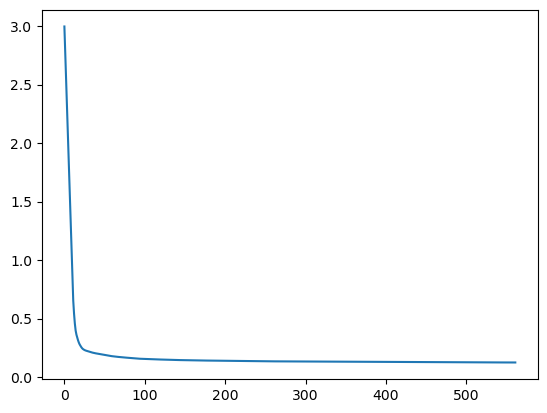

In [24]:
plt.plot(gd.rvals)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
YY = mod.evaluate(X)
print(accuracy_score(np.sign(YY), Y))

0.95


In [27]:
xrange = np.linspace(-4,4,100)
yrange = np.linspace(-4,4,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[(XX.ravel(), YY.ravel())]
ZZ = mod.evaluate(XY)
ZZ = ZZ.reshape(XX.shape)

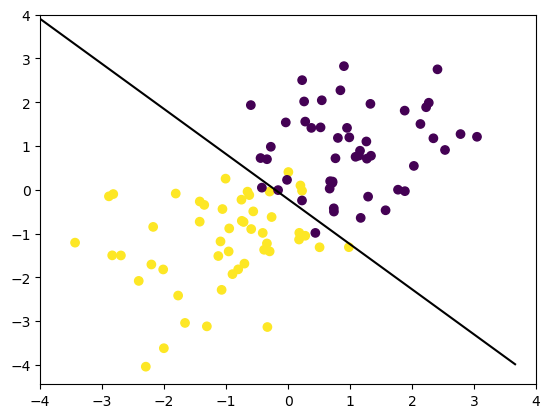

In [28]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.contour(ZZ, levels=[0.], extent=(-4,4,-4,4), colors='k')
plt.show() 

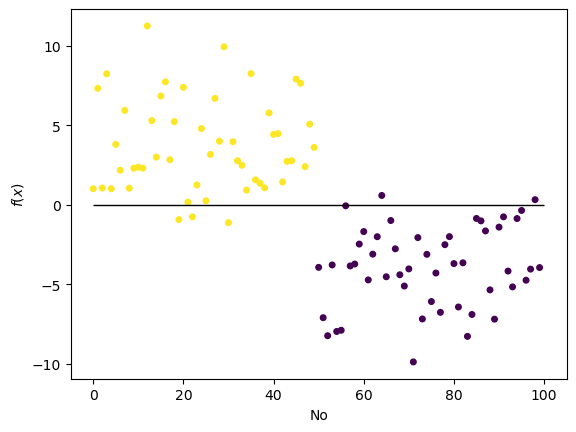

In [29]:
plt.scatter(range(100), mod.evaluate(X), c=Y, s=16)
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$f(x)$")
plt.show()

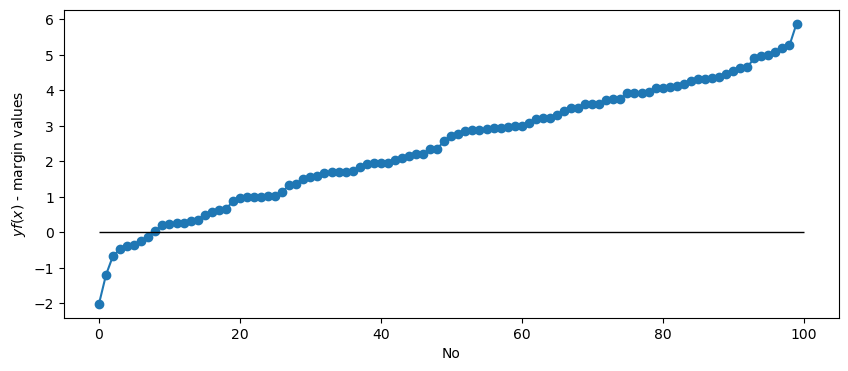

In [13]:
plt.figure(figsize=(10,4))
plt.plot(sorted(Y*mod.evaluate(X)),marker='o')
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$yf(x)$ - margin values")
plt.show()

In [57]:
mod2 = models.SigmaNeuronModel(funcs.Sigmoidal(alpha=3.0), 2)
mod2.param = np.random.random(mod2.n_param)
loss_func2 = lossfuncs.ErrorLoss(funcs.Square())
risk_func2 = risks.Risk(mod2, loss_func2)
gd2 = gda.GradientDescent(risk_func2, h=0.05, tol=1.0e-6)

In [58]:
gd2.fit(X, Y)

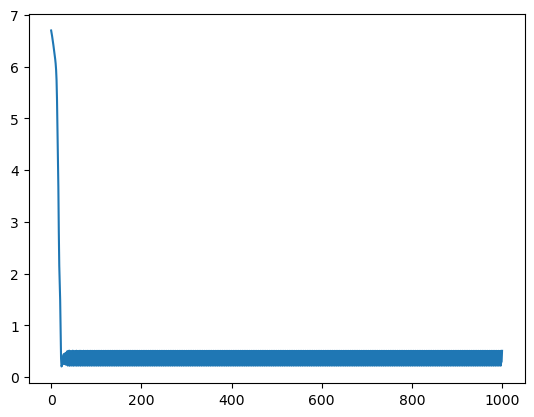

In [59]:
plt.plot(gd2.rvals)
plt.show()

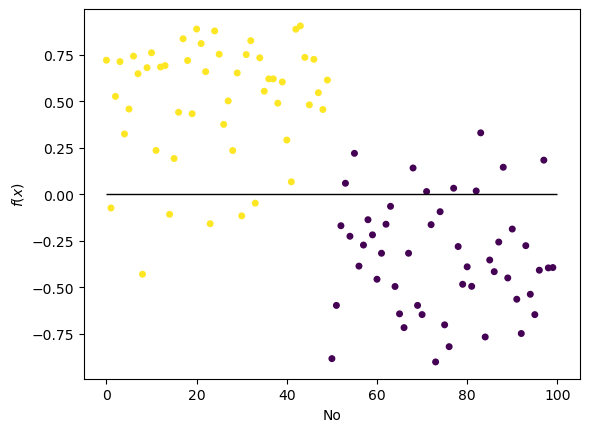

In [60]:
plt.scatter(range(100), sigma_func.evaluate(mod2.evaluate(X)), c=Y, s=16)
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$f(x)$")
plt.show()

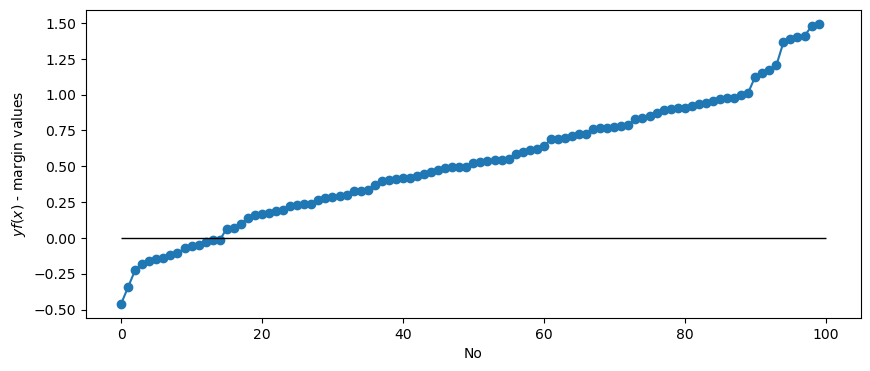

In [61]:
plt.figure(figsize=(10,4))
plt.plot(sorted(Y*mod2.evaluate(X)),marker='o')
plt.hlines(0, 0, 100, colors='k', linewidth=1.0)
plt.xlabel("No")
plt.ylabel(r"$yf(x)$ - margin values")
plt.show()